## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharma_data_complete_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
#pharma_data_complete_df.head()
pharma_data_complete_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [2]:
# Checking the number of mice.
len(pharma_data_complete_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pharma_data_complete_df[pharma_data_complete_df.duplicated(["Mouse ID"], keep=False)]
pharma_data_complete_df[["Mouse ID", "Timepoint"]]


,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
pharma_data_complete_df[pharma_data_complete_df.duplicated(["Mouse ID"], keep=False)]
pharma_data_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unduplicated_mouse_pharma_df = pharma_data_complete_df.drop_duplicates(["Mouse ID", "Timepoint"], keep="last")
unduplicated_mouse_pharma_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unduplicated_mouse_pharma_df["Mouse ID"].count()

1888

## Summary Statistics

In [7]:
#For the first DataFrame, use the groupby method to generate the mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each drug regimen. This should result in five unique Series objects. 
#Combine these objects into a single summary statistics DataFrame.

summary_df = pd.DataFrame({
    "Mean Tumor Volume": unduplicated_mouse_pharma_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"],
    "Median Tumor Volume": unduplicated_mouse_pharma_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"],
    "Tumor Volume Variance": unduplicated_mouse_pharma_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"],
    "Tumor Volume Standard Deviation": unduplicated_mouse_pharma_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"],
    "Tumor Volume SEM": unduplicated_mouse_pharma_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
})

#print dataframe
summary_df


########__________GRAVEYARD Of ABANDONED CODE______________######


#REMINDER
# This-----> "unduplicated_mouse_pharma_df.groupby("Drug Regimen").mean()" <------ creates a groupby object
# This-----> "unduplicated_mouse_pharma_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"] <------ selects a column from the groupby object

#.copy makes the new dataframe from the OG

#thank goodness for Erin

#numfocus - check it out! Check out pydata for meetup and post res meetup

#do some online courses for sql etc - specialty building

#pd.DataFrame.from_dict(summary_df)

#summary_df["Mean Metastatic Sites"] = unduplicated_mouse_pharma_df.groupby("Drug Regimen").mean()["Metastatic Sites"]

# summary_df = pd.DataFrame()

# summary_df["Mean Tumor Volume"] = unduplicated_mouse_pharma_df.groupby("Drug Regimen").mean(),
# summary_df["Median Tumor Volume"] = unduplicated_mouse_pharma_df.groupby("Drug Regimen").median(),
# summary_df["Tumor Volume Variance"] = unduplicated_mouse_pharma_df.groupby("Drug Regimen").var(),
# summary_df["Tumor Volume Standard Deviation"] = unduplicated_mouse_pharma_df.groupby("Drug Regimen").std(),
# summary_df["Tumor Volume SEM"] = unduplicated_mouse_pharma_df.groupby("Drug Regimen").sem()

# summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#For the second DataFrame, use the agg method to produce the same summary statistics table by using a single line of code. (Erin helped!)
better_summary_df = unduplicated_mouse_pharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

#print dataframe and sort 
better_summary_df.sort_values(by=['mean'], ascending=False)

,mean,median,var,std,sem
Drug Regimen,,,,,
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346


## Bar and Pie Charts

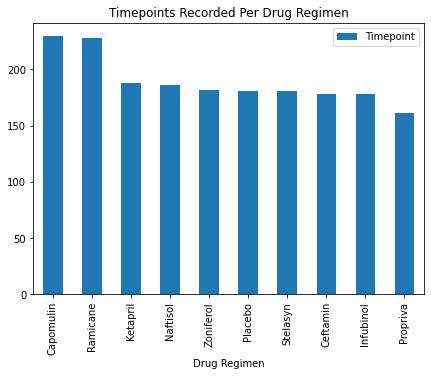

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
drug_and_timepoint_per_mouse = pharma_data_complete_df[["Drug Regimen","Timepoint"]]

# Group by "Drug Regimen" to see if can use a label and count instances of "timeperiod" per drug regimen
drug_and_timepoint_per_mouse = drug_and_timepoint_per_mouse.groupby("Drug Regimen").count().sort_values(by=["Timepoint"],ascending=False)

# Use DataFrame.plot() in order to create a bar chart of the data
drug_and_timepoint_per_mouse.plot(kind="bar", figsize=(7,5))

# Set a title for the chart
plt.title("Timepoints Recorded Per Drug Regimen")

# Show figure
plt.show()



########__________GRAVEYARD Of ABANDONED CODE______________######

# figure1 = unduplicated_mouse_pharma_df.plot(kind="bar", color=["red", "blue"],
#                                    title="Major Collective Bargaining Settlements (1995)",
#                                    xlabel="Union",
#                                    ylabel="Settlements")

# # Configure x-tick rotation
# xticklabels = unduplicated_mouse_pharma_df.index
# figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# # Show plot
# plt.show()

# # Set x axis and tick locations
# x_axis = np.arange(len(unduplicated_mouse_pharma_df))
# tick_locations = [value for value in x_axis]

# # Create a list indicating where to write x labels and set figure size to adjust for space
# plt.figure(figsize=(20,4))
# plt.bar(x_axis, len(unduplicated_mouse_pharma_df["Timepoint"]), color='r', alpha=0.5, align="center")
# plt.xticks(tick_locations, unduplicated_mouse_pharma_df["Drug Regimen"], rotation="vertical")

# # Set x and y limits
# plt.xlim(-0.75, len(x_axis))
# plt.ylim(0, max(unduplicated_mouse_pharma_df["Timepoint"])+10)

# # Save our graph and show the grap
# plt.tight_layout()
# plt.show()

<AxesSubplot:xlabel='Drug Regimen'>

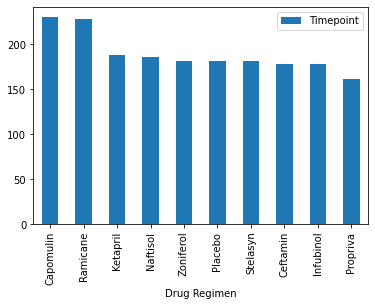

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_and_timepoint_per_mouse.plot.bar()


<AxesSubplot:title={'center':'Sex Breakdown of Mice in Sample'}, ylabel='Sex'>

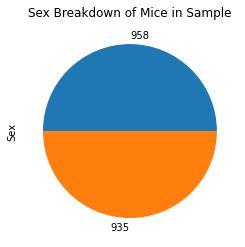

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Use series created before to generate new plot using pandas
mouse_sex = pharma_data_complete_df["Sex"].value_counts()

mouse_sex.value_counts().plot(kind="pie", y="Sex", title="Sex Breakdown of Mice in Sample")


<AxesSubplot:title={'center':'Sex Breakdown of Mice in Sample'}, ylabel='Sex'>

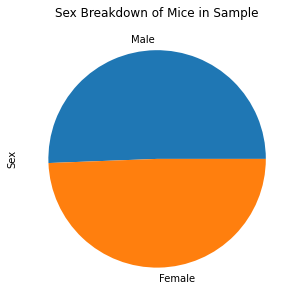

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Filter the DataFrame down only to those columns to chart
mouse_sex = pharma_data_complete_df["Sex"].value_counts()

# Use DataFrame.plot() in order to create a bar chart of the data
mouse_sex.plot.pie(y="mouse_sex", figsize=(5, 5))

# Set a title for the chart
plt.title("Sex Breakdown of Mice in Sample")

# Show figure
mouse_sex.plot()


## Quartiles, Outliers and Boxplots

In [13]:
# 1. Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
        #Capomulin, Ramicane, Infubinol, and Ceftamin. Then, calculate the quartiles and IQR and determine if 
        #there are any potential outliers across all four treatment regimens. Follow these substeps:

        # * Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
            #Merge this grouped DataFrame with the original cleaned DataFrame.

        # * Create a list that holds the treatment names, as well as a second, empty list to hold the tumor 
            #volume data.

        # * Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond 
            #to each treatment. Append the resulting final tumor volumes for each drug to the empty list. 

        # * Determine outliers by using the upper and lower bounds, and then print the results.

        
#Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
                                #?? NO NEED TO MERGE! ??
    #oh yes we do need to merge because the below dataframe calculated the "max" for tumor value, and we need
    #the actual value associated with the entry, not the "max" value of the tumor volume
    
greatest_timepoint_df = pharma_data_complete_df.groupby("Mouse ID").max()["Timepoint"]

#greatest_timepoint_df

real_pharma_data_df = pd.merge(pharma_data_complete_df, greatest_timepoint_df, on=["Mouse ID", "Timepoint"])

#real_pharma_data_df.count()

treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_data = []

#create for loop
for drug in treatment_names:
    tumor_data = real_pharma_data_df[real_pharma_data_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_data)
    
    #NOW DEFINE UPPER AND LOWER BOUNDS and Determine outliers by using the upper and lower bounds. 

    q1 = tumor_data.quantile(q=0.25)
    q3 = tumor_data.quantile(q=0.75)
    iqr = q3 - q1
    lower = (q1 - 1.5*iqr)
    upper = (q3 + 1.5*iqr)
    outliers = tumor_data[(tumor_data < lower) | (tumor_data > upper)]
    print(f"{drug}'s potential outliers are: {outliers}")

#tumor_volume_data


########__________GRAVEYARD OF ABANDONED CODE______________######

# names =['LOAN', 'AMOUNT','VALUE','LUV','UR']
# for column in data[names]:        
#     x,y=calculateLowerUpper(column)
#     print (column)
#     print(x)
#     print(y)

# def calculateLowerUpper(column):
#     q1= data['LOAN'].quantile(q=0.25)
#     q3= data['LOAN'].quantile(q=0.75)  
#     iqr= q3 - q1   
#     lower = (q1 - 1.5*iqr) 
#     upper = (q3 + 1.5*iqr) 
#     return lower,upper

# tumor_volume_data = {}

# #create for loop
# for drug in treatment_names:
#     #this is the empty dict_"drug" is the key_locate the column we want to 
#     #loop through_and compare it to drug (which is the varible I set) and here its comparing each value of 
#     #drug to itself_specify only the tumor value that I like 
#     tumor_volume_data[drug] = real_pharma_data_df[real_pharma_data_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]

# #create dataframe with dict (don't drop n/a to 0 else it will 
# tumor_volume_data_df = pd.DataFrame(tumor_volume_data)

# tumor_volume_data_df

# keep="last" for drop_duplicates

##^ THIS WILL BE THE HARDEST


# final_mouse_drug = pd.DataFrame(combined_data_df.groupby("Mouse ID").max()["Timepoint"])
# merged_mouse =pd.merge(final_mouse_drug,combined_data_df, on=("Mouse ID", "Timepoint"))
# merged_mouse

#pharma_data_complete_df.drop_duplicates(["Timepoint"], keep="last")
# unduplicated_mouse_pharma_df


Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


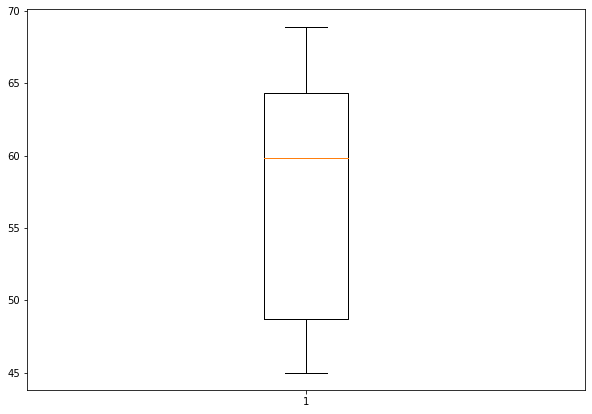

In [14]:
# 2. Using Matplotlib, generate a box plot of the final tumor volume for all four treatment regimens. Highlight 
        #any potential outliers in the plot by changing their color and style.

fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(tumor_data)
 
# show plot
plt.show()


## Line and Scatter Plots

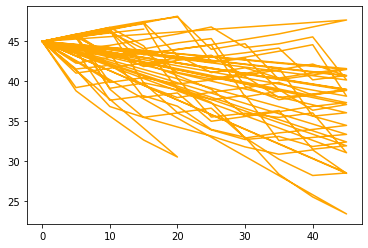

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#pharma_data_complete_df

# Filter the DataFrame down only to those columns to chart
drug_and_tp_df = pharma_data_complete_df[["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

#Filter to only specific drug regimen
capomulin_df = drug_and_tp_df[drug_and_tp_df["Drug Regimen"].str.contains("Capomulin")]

#plot the scatter plot for this drug regimen
plt.plot(capomulin_df["Timepoint"], capomulin_df["Tumor Volume (mm3)"], c ="orange")
 
# To show the plot
plt.show()


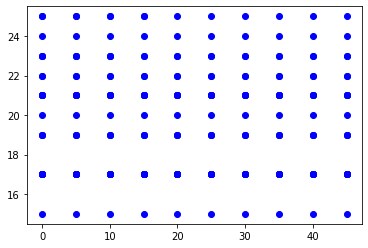

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Filter the DataFrame down only to those columns to chart
weight_and_tp_df = pharma_data_complete_df[["Drug Regimen", "Timepoint", "Weight (g)"]]                                          
                                        
#Filter to only specific drug regimen
capomulin_weight_df = weight_and_tp_df[weight_and_tp_df["Drug Regimen"].str.contains("Capomulin")]

capomulin_weight_df
                                           
plt.scatter(capomulin_weight_df["Timepoint"], capomulin_weight_df["Weight (g)"], c ="blue")

# To show the plot
plt.show()
             

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Filter the DataFrame down only to those columns to chart
weight_and_tumor_df = pharma_data_complete_df[["Drug Regimen", "Tumor Volume (mm3)", "Weight (g)"]]                                          

#Filter to only specific drug regimen
capomulin_weight_and_tumor_df = weight_and_tumor_df[weight_and_tumor_df["Drug Regimen"].str.contains("Capomulin")]

correlation = np.corrcoef(capomulin_weight_and_tumor_df["Weight (g)"], capomulin_weight_and_tumor_df["Tumor Volume (mm3)"])

correlation

array([[1.        , 0.52569956],
       [0.52569956, 1.        ]])

In [30]:
regression = st.linregress(capomulin_weight_and_tumor_df["Weight (g)"],capomulin_weight_and_tumor_df["Tumor Volume (mm3)"])

regression

LinregressResult(slope=0.9609669432428346, intercept=21.489827213299584, rvalue=0.5256995552077166, pvalue=9.605446629502282e-18, stderr=0.10298279892023657, intercept_stderr=2.075157005491298)